/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Test accuracy: 0.9979285714285714


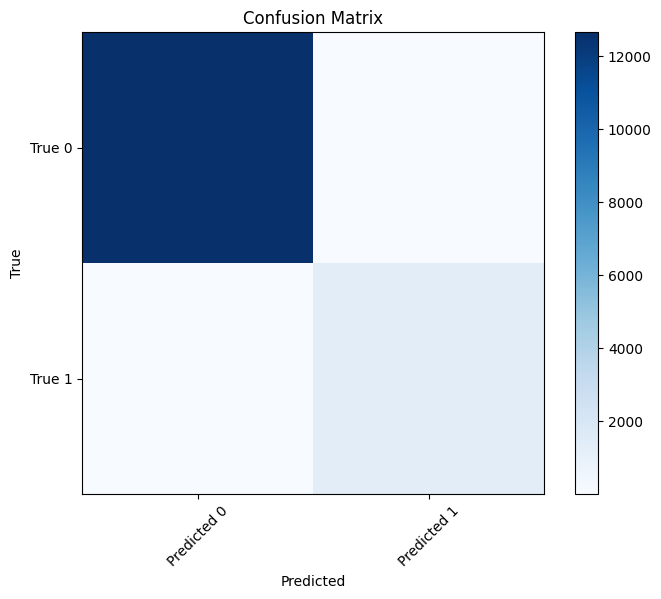


Classification Report:
              precision    recall  f1-score   support

     Digit 0       1.00      1.00      1.00     12657
       Not 0       1.00      0.98      0.99      1343

    accuracy                           1.00     14000
   macro avg       1.00      0.99      0.99     14000
weighted avg       1.00      1.00      1.00     14000



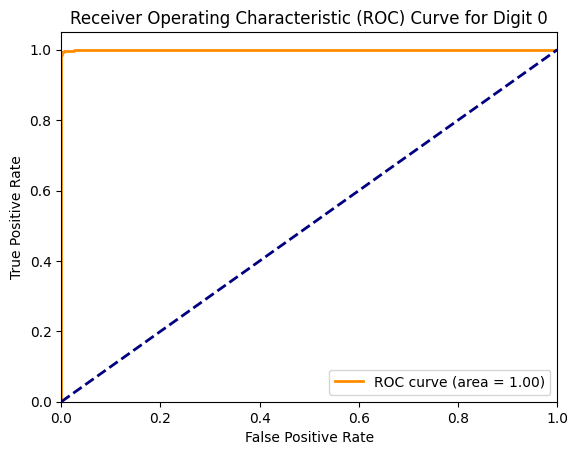

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset using scikit-learn
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose one class as the positive class (e.g., digit "0")
positive_class = 0

# Create a binary target variable where 1 corresponds to the positive class and 0 to others
binary_train_labels = np.where(y_train == positive_class, 1, 0)
binary_test_labels = np.where(y_test == positive_class, 1, 0)

# Create and train an SVM classifier
clf = svm.SVC()
clf.fit(X_train, binary_train_labels)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(binary_test_labels, y_pred)
print(f'Test accuracy: {accuracy}')

# Plot the Confusion Matrix Heatmap
cm = confusion_matrix(binary_test_labels, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [f'Predicted {i}' for i in range(2)], rotation=45)
plt.yticks(tick_marks, [f'True {i}' for i in range(2)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(binary_test_labels, y_pred, target_names=[f'Digit {positive_class}', f'Not {positive_class}']))

# ROC Curve
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(binary_test_labels, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for Digit {positive_class}')
plt.legend(loc='lower right')
plt.show()
